# 📚 Welcome to the Cost of International Education Dataset Analysis! 🌍

🎢 This project will take you on a wild ride through the world of international education costs! 🌍💸 EduSpend transforms a rich global dataset — packed with tuition fees 🎓, living-cost indices 🏙️, rent 💰, visa charges 🛂, and insurance premiums 🛡️ — into actionable insights for students 👩‍🎓👨‍🎓, consultants 💼, and policymakers 🏛️.

On this adventure, EduSpend will:

🌐 benchmark real costs across countries, cities, and degree levels;

🔮 predict total cost of attendance (TCA) for any program profile;

💡 classify study destinations into affordability tiers;

🏫 segment universities by their cost structures;

📊 deliver an interactive Streamlit app for smarter budget planning and market comparison.

Ready to explore? 🚀✨

# Week 1: Exploratory data anaylsis

In this section, we'll import all the necessary Python libraries and load our dataset using kagglehub.
This will set us up for a smooth exploratory data analysis journey! 🚀

In [1]:
!pip install kagglehub

In [2]:
!pip install --upgrade kagglehub

In [3]:
#import packages
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import and read the dataset
path = kagglehub.dataset_download("adilshamim8/cost-of-international-education")
print(os.listdir(path))
df = pd.read_csv(os.path.join(path, "International_Education_Costs.csv"))
pd.set_option("max_info_columns", 100)

['International_Education_Costs.csv']


# 📊 Data Overview
Let's take a closer look at the dataset to understand its structure and contents.

In [5]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


✨ As we can see, our dataset is in great shape — it’s clean, organized, and (fortunately for us!) we don’t have to deal with any missing values 🚫🔍. That means we can jump straight into the fun part: the analysis! 📈🚀

In [6]:
# Display summary statistics of the DataFrame
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


In [7]:
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


👀 So, at first glance, it’s easy to see why so many people struggle to pay back student loans in the US 💸🎓. The costs really do add up fast, making repayment a major challenge for many graduates 🏦😓.

#### Handling missing values and duplicates

In [8]:
#Handling missing values
print("\nHandling missing values\n{}".format("-" * 35))
for i in df.columns: 
    if df[i].isna().sum() !=0:
        print("null values in ", i, "column:", data[i].isna().sum())
    else: 
        print("There is no missing values in the columns")

# handle duplicates 
print("\nHandling duplicate values\n{}".format("-" * 35))

if df.duplicated().sum():
    print(f"Number of duplicated rows: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)
else: 
    print("No duplicates")


Handling missing values
-----------------------------------
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns

Handling duplicate values
-----------------------------------
No duplicates


🔎 So, our exploratory analysis came back pretty clean — no big surprises or issues! ✅ Let’s move on to the next stage: diving deeper into the EDA 📊🚀.

# EDA

- Profile cost distributions by Country, City, Level, and Program.
- Visualize correlations among Tuition_USD, Living_Cost_Index, Rent_USD, and Exchange_Rate.
- Compute baseline Total Cost of Attendance (tuition + rent × months + visa + insurance × years).
- Detect outliers and assess currency-conversion stability.



Profile cost distributions by Country, City, Level, and Program.

In [9]:
df.columns

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate'],
      dtype='object')

In [10]:
# Group data by country, city, Level, and Program
grouped = df.groupby(["Country", "City", "Level", "Program"])[["Duration_Years","Tuition_USD", "Living_Cost_Index", "Rent_USD", "Visa_Fee_USD", "Insurance_USD","Exchange_Rate"]].mean().reset_index()

In [11]:
grouped.head()

,Country,City,Level,Program,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,Algeria,Algiers,Bachelor,Computer Science,3.0,1200.0,38.5,250.0,80.0,200.0,137.5
1,Algeria,Annaba,Master,Computer Engineering,2.0,1000.0,34.5,180.0,80.0,200.0,137.5
2,Algeria,Constantine,PhD,Data Analytics,4.0,1300.0,35.8,200.0,80.0,200.0,137.5
3,Algeria,Oran,Master,Computer Engineering,2.0,1100.0,36.4,220.0,80.0,200.0,137.5
4,Algeria,Tlemcen,Bachelor,Information Systems,3.0,900.0,33.2,160.0,80.0,200.0,137.5



Tuition_USD - Skewness: 0.8176176452083808


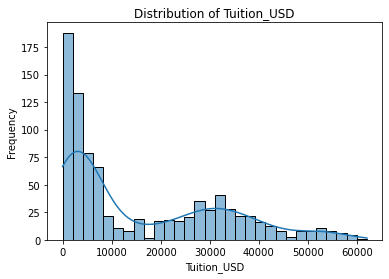


Living_Cost_Index - Skewness: -0.07252016346044683


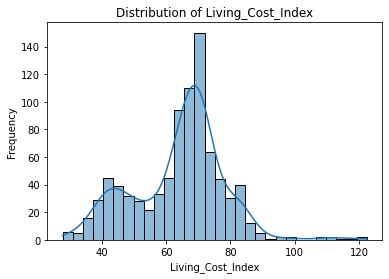


Rent_USD - Skewness: 0.5659167064440298


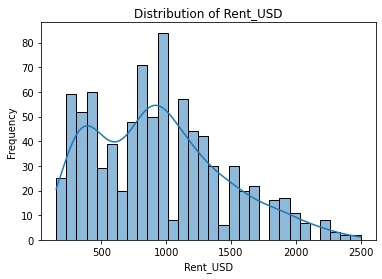


Visa_Fee_USD - Skewness: 1.102561821598457


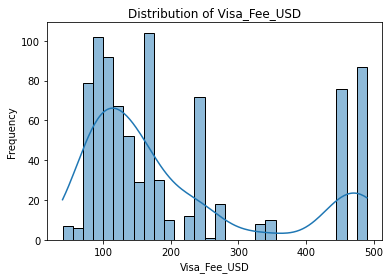


Insurance_USD - Skewness: 1.004908213361051


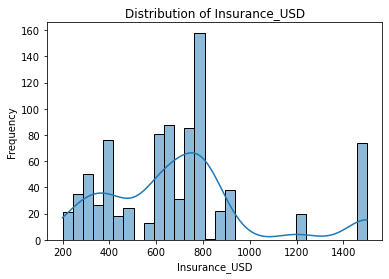


Duration_Years - Skewness: 0.34670531744472327


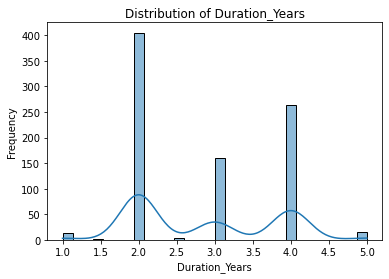

In [12]:
from statsmodels.tools.tools import add_constant

# Let's enhance the exploratory analysis:

# 1. Analyze distributions and skewness of numeric features
numeric_vars = ["Tuition_USD", "Living_Cost_Index", "Rent_USD", "Visa_Fee_USD", "Insurance_USD", "Duration_Years"]
for var in numeric_vars:
    print(f"\n{var} - Skewness: {grouped[var].skew()}")
    sns.histplot(grouped[var], kde=True, bins=30)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()




👉 Tuition_USD – Skewness: 0.82
➡️ Positive skew (🔹💲💲💲💲📈) — most tuitions cluster at the lower end, but a few very high tuition values pull the distribution to the right (longer right tail).

👉 Living_Cost_Index – Skewness: -0.07
➡️ Very close to 0 (⚖️) — this is almost symmetric! Costs are pretty evenly spread out, no strong skew.

👉 Rent_USD – Skewness: 0.57
➡️ Mild positive skew (🔸📊) — most values are on the lower side, but some higher ones pull it slightly to the right.

👉 Visa_Fee_USD – Skewness: 1.10
➡️ Stronger positive skew (💲💲💲➡️📈) — majority of values are low/moderate, but some big numbers stretch the right tail noticeably.

👉 Insurance_USD – Skewness: 1.00
➡️ Positive skew again (💵💵➡️📈) — most insurance premiums are low, but some pricier plans push the tail to the right.

👉 Duration_Years – Skewness: 0.34
➡️ Positive skew again (💵💵➡️📈) — most programs push the tail to the right, having the mayority of them lasting 2 years.

⚡ Quick tip:

Skewness ≈ 0 → data is symmetric ⚖️

Positive skew (>0) → right tail is longer 📈

Negative skew (<0) → left tail is longer 📉

### Compute baseline Total Cost of Attendance (tuition + rent × months + visa + insurance × years).

In [13]:
# # 2. Calculating Total Cost
grouped["Total_Cost_USD"] = grouped["Tuition_USD"] + grouped["Living_Cost_Index"] + (grouped["Rent_USD"]*(grouped["Duration_Years"]/12)) + grouped["Visa_Fee_USD"] + (grouped["Insurance_USD"] * grouped["Duration_Years"])

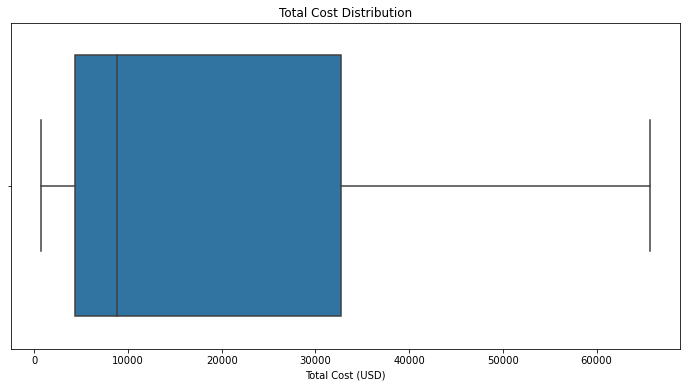

In [14]:
#Visualizing the Total Cost
plt.figure(figsize=(12, 6))
sns.boxplot(x=grouped["Total_Cost_USD"])
plt.title("Total Cost Distribution")
plt.xlabel("Total Cost (USD)")
plt.show()

* This boxplot is showing that most students’ total costs fall somewhere between about $10,000 and $30,000 💸, with exceptions being shown pushing to mostly the higher end.

* Since the median is a bit toward the lower end of the IQR (closer to $10K), it suggests that the costs are a bit right-skewed 📈.

* As for our lovely whiskers, they stretch towards the smallest and largest values that are not considered outliers.

* The upper whisker extends all the way out toward $60K+, meaning there are a few really expensive programs pushing that edge 💰.

So, to sum up:

💡 The total costs are mostly between $10K and $30K, but there are some programs that are way more expensive (up to $60K+), pulling that upper whisker far out.
💡 This distribution is right-skewed → a few pricey programs make the overall costs look higher on average than most students actually pay.

* So far there doesen't seem to be any outliers, but let's make sure that this is a fact.



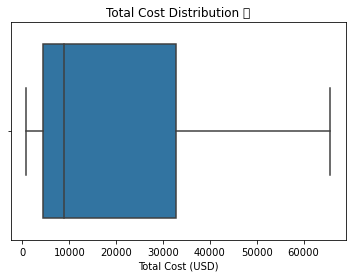

In [15]:
sns.boxplot(data=grouped, x="Total_Cost_USD", showfliers=True)
plt.title("Total Cost Distribution 💸")
plt.xlabel("Total Cost (USD)")
plt.show()


🚀 And Houston, we definitely have some outliers on the higher end of our boxplot! 🌌

💸 These outliers shoot up from around 200K USD all the way to a jaw-dropping 300K USD — making these programs insanely expensive compared to the rest 🎓💰.

📈 Most of these sky-high costs seem to cluster between 200K and 250K USD, creating a big gap between regular programs and these premium price tags! 😲💸

Let's see if for the rest of our variables we have outliers.

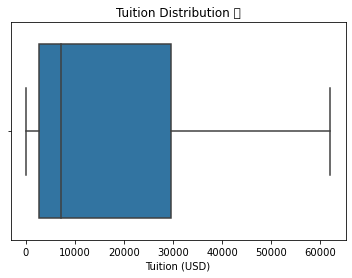

In [16]:
# Detecting Tuition Outliers
sns.boxplot(data=grouped, x="Tuition_USD", showfliers=True)
plt.title("Tuition Distribution 💸")
plt.xlabel("Tuition (USD)")
plt.show()

✅ This one looks pretty much in order — no outliers in sight! 🌟
🎓 Most students’ tuition falls comfortably between 10K and 30K USD, forming a nice, compact distribution.
💸 Just like before, we do see a few crazy high tuition prices pushing the skewness to the right 📈, but thankfully, the vast majority of students pay within that 10K–30K range.

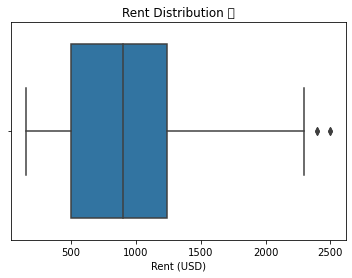

In [17]:
# Detecting Rent Outliers
sns.boxplot(data=grouped, x="Rent_USD", showfliers=True)
plt.title("Rent Distribution 💸")
plt.xlabel("Rent (USD)")
plt.show()

🏠 Here we do have some clear outliers — students paying up to 💸 2,500 USD for rent!
📊 The majority, though, fall between 500 USD and 1,400 USD, with the median sitting close to 1,000 USD 🏙️.
⬇️ The whiskers stretch down on the lower end without outliers, meaning we have students paying less than 500 USD for rent (lucky them! 🍀).
⬆️ On the upper end, a few are paying up to 2,400 USD, adding to that rent price spread! 😲

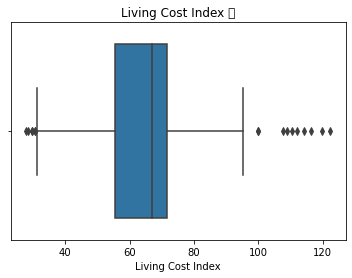

In [18]:
# Detecting Living Cost Index Outliers
sns.boxplot(data=grouped, x="Living_Cost_Index", showfliers=True)
plt.title("Living Cost Index 💸")
plt.xlabel("Living Cost Index")
plt.show()

🌍 As for the Living Cost Index, we see outliers on both ends!

💸 Some students are spending as little as under 40 USD — amazing savings! 🌱

💰 Others go all the way up to 120 USD, which is quite high compared to the rest.

🏙️ These differences could be tied to where students live:

➡️ Those with lower costs might be renting a room 🛏️, living on campus 🏫, or even staying with family 👨‍👩‍👧‍👦 — which would really help squeeze down those living expenses.

➡️ On the higher end, students might be in pricier cities like New York 🗽, living far from campus and spending more on transportation 🚇, or choosing groceries 🍎 over campus dining options 🍽️ — all of which could push up living costs.

⚖️ Overall, though, it seems most students — regardless of country, program, or university — spend between 50 and 70 USD on living costs, with the median closer to 70 USD ✨.

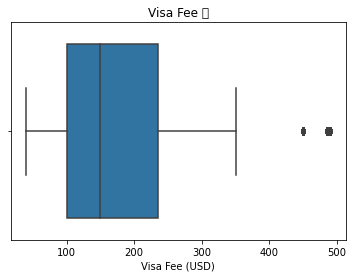

In [19]:
# Detecting Visa Fee Outliers
sns.boxplot(data=grouped, x="Visa_Fee_USD", showfliers=True)
plt.title("Visa Fee 💸")
plt.xlabel("Visa Fee (USD)")
plt.show()

🛂 For the visa fee, we see that most students spend between 🏷️ 100 and 220 USD, with the median landing closer to 150 USD.

📈 We do detect some outliers starting around 450 USD and climbing all the way to 500 USD — definitely on the pricier side! 💸

**💡 Key Factors Influencing Visa Costs**

**🔄 Reciprocity**
🤝 If two countries have friendly visa agreements, costs may be low or even waived for each other’s citizens!

**📋 Processing Costs**
💻✉️ Fees may cover background checks, paperwork, admin tasks, and all the behind-the-scenes work to approve a visa.

**🔥 Demand**
🌟 Highly sought-after visas (e.g., investment or citizenship pathways) often come with premium price tags 💸.

**👀 Perceived Value of Visitors**
💡 Some countries charge higher fees for citizens of regions seen as less desirable tourists or immigrants — often poorer or politically unstable areas 🌪️.

**💸 Economic Considerations**
🏖️ Visa fees can help attract wealthy tourists or control how many visitors enter a country.

**🛡️ Security Concerns**
Countries with tight immigration policies might charge more to fund detailed security checks 🔍🕵️‍♂️.

**🌐 Bilateral Relations**
💼 Diplomatic ties, trade deals, and political relationships often influence visa costs — good friends may pay less, rivals more!

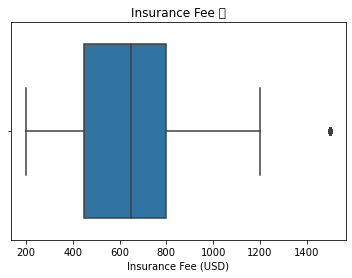

In [20]:
# Detecting Insurance Outliers
sns.boxplot(data=grouped, x="Insurance_USD", showfliers=True)
plt.title("Insurance Fee 💸")
plt.xlabel("Insurance Fee (USD)")
plt.show()

🩺 As for the insurance fee, this one looks pretty stable overall!
💵 Most students pay between 400 USD and 800 USD for their insurance.

⬇️ The whiskers stretch as low as 200 USD (no outliers down there — nice savings! 🌱),
⬆️ and as high as 1,200 USD, with a few outliers pushing beyond 1,400 USD! 😮

👀 These outliers could represent super careful folks 🛡️ who want to make sure they’re covered no matter what — because, let’s face it, healthcare 🏥 isn’t free in most countries, and without insurance, those medical bills can hit your wallet hard 💸.
📌 Plus, many countries require students to have a valid insurance plan to get any medical care covered at all!

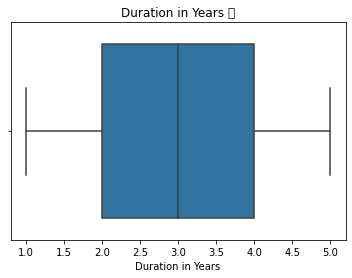

In [21]:
# Detecting Duration in Years Outliers
sns.boxplot(data=grouped, x="Duration_Years", showfliers=True)
plt.title("Duration in Years 💸")
plt.xlabel("Duration in Years")
plt.show()

Very beautiful graph with no ouliers. Most of the programs go between 2 and 4 years, with the median laying in 3. Althpugh we do have some programs that last only 1 year, or 5.

In [22]:
# 3.💸 Compute Total Cost USD
grouped["Total_Cost_USD"] = (
    (grouped["Tuition_USD"] * grouped["Duration_Years"]) +  # tuition over duration
    (grouped["Rent_USD"] * grouped["Duration_Years"]) +     # rent over duration
    (grouped["Living_Cost_Index"] * grouped["Duration_Years"]) +  # living cost over duration (if applicable)
    grouped["Visa_Fee_USD"] +                               # visa fee (one-time)
    (grouped["Insurance_USD"] * grouped["Duration_Years"])  # insurance over duration
)

# ✅ Check the result
print(grouped[["Tuition_USD", "Rent_USD", "Living_Cost_Index", "Visa_Fee_USD", "Insurance_USD", "Duration_Years", "Total_Cost_USD"]].head())


   Tuition_USD  Rent_USD  Living_Cost_Index  Visa_Fee_USD  Insurance_USD  \
0       1200.0     250.0               38.5          80.0          200.0   
1       1000.0     180.0               34.5          80.0          200.0   
2       1300.0     200.0               35.8          80.0          200.0   
3       1100.0     220.0               36.4          80.0          200.0   
4        900.0     160.0               33.2          80.0          200.0   

   Duration_Years  Total_Cost_USD  
0             3.0          5145.5  
1             2.0          2909.0  
2             4.0          7023.2  
3             2.0          3192.8  
4             3.0          3959.6  


In [23]:
# 4. Top and bottom 10 countries by average tuition fees
if "Total_Cost_USD" in grouped.columns:
    top_countries = grouped.groupby("Country")["Total_Cost_USD"].mean().sort_values(ascending=False).head(10)
    print("Top 10 countries by average total cost:\n", top_countries)
    bottom_countries = grouped.groupby("Country")["Total_Cost_USD"].mean().sort_values(ascending=True).head(10)
    print("Bottom 10 countries by average total cost:\n", bottom_countries)
else:
    print("⚠️ 'Total_Cost_USD' column not found! Columns available:", grouped.columns)


Top 10 countries by average total cost:
 Country
USA            169918.470270
Singapore      117521.607778
Australia      102886.540404
Canada          96870.792958
Hong Kong       96834.400000
UK              87368.040230
New Zealand     82758.166667
UAE             79659.075000
Ireland         56393.310000
Israel          42378.600000
Name: Total_Cost_USD, dtype: float64
Bottom 10 countries by average total cost:
 Country
Argentina     2296.133333
Greece        3436.717647
Finland       4397.027273
Algeria       4446.020000
Sweden        4457.250000
Iceland       4771.766667
Norway        4772.654545
Germany       4905.990625
Tunisia       4910.516667
Luxembourg    5708.500000
Name: Total_Cost_USD, dtype: float64


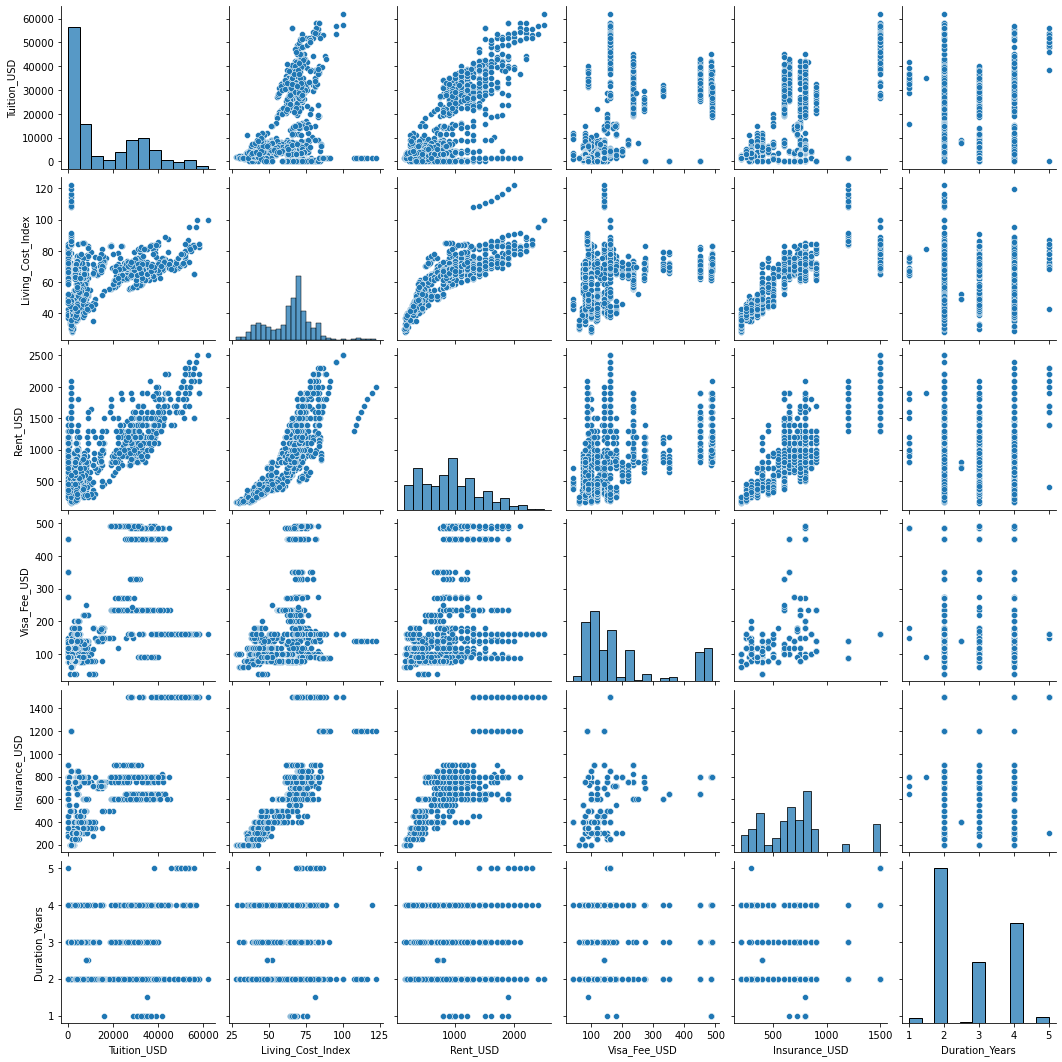

In [24]:
# 5. Visualize relationships between numeric features
sns.pairplot(grouped[numeric_vars])

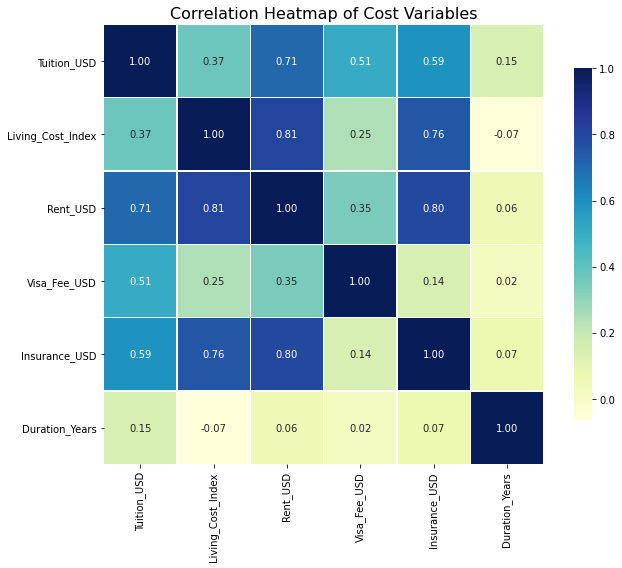

In [25]:
# 6. Correlation heatmap
plt.figure(figsize=(10, 8))
corr = grouped[numeric_vars].corr()
sns.heatmap(
    corr,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True
)
plt.title("Correlation Heatmap of Cost Variables", fontsize=16)
plt.tight_layout()
plt.show()

👀 So, at first glance, we can see that our strongest correlations are between Living_Cost and Rent 🏙️🏠, Rent and Insurance 🏠🛡️, and Insurance and Living_Cost 🛡️💸 — which is pretty interesting! These cost factors seem to move closely together 📈🤔.

Now let's dive into our set questions.

In [26]:
# Categorize correlation values
correlation_matrix = grouped[numeric_vars].corr()
correlation_table = []

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
    
        if col != idx:  # Avoid self-correlation
            corr_value = correlation_matrix.loc[idx, col]
            if corr_value >= 0.8:
                category = "Highly Correlated"
            elif 0.5 <= corr_value < 0.8:
                category = "Moderately Correlated"
            elif 0.3 <= corr_value < 0.5:
                category = "Weakly Correlated"
            else:
                category = "No Correlation"
            correlation_table.append({"Variable 1": idx, "Variable 2": col, "Correlation": corr_value, "Category": category})

# Convert to DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_table)
print(correlation_df)

           Variable 1         Variable 2  Correlation               Category
0   Living_Cost_Index        Tuition_USD     0.372390      Weakly Correlated
1            Rent_USD        Tuition_USD     0.707477  Moderately Correlated
2        Visa_Fee_USD        Tuition_USD     0.507165  Moderately Correlated
3       Insurance_USD        Tuition_USD     0.593661  Moderately Correlated
4      Duration_Years        Tuition_USD     0.150184         No Correlation
5         Tuition_USD  Living_Cost_Index     0.372390      Weakly Correlated
6            Rent_USD  Living_Cost_Index     0.812328      Highly Correlated
7        Visa_Fee_USD  Living_Cost_Index     0.250201         No Correlation
8       Insurance_USD  Living_Cost_Index     0.756236  Moderately Correlated
9      Duration_Years  Living_Cost_Index    -0.065648         No Correlation
10        Tuition_USD           Rent_USD     0.707477  Moderately Correlated
11  Living_Cost_Index           Rent_USD     0.812328      Highly Correlated

In [27]:
print(grouped[numeric_vars].corr())

                   Tuition_USD  Living_Cost_Index  Rent_USD  Visa_Fee_USD  \
Tuition_USD           1.000000           0.372390  0.707477      0.507165   
Living_Cost_Index     0.372390           1.000000  0.812328      0.250201   
Rent_USD              0.707477           0.812328  1.000000      0.345042   
Visa_Fee_USD          0.507165           0.250201  0.345042      1.000000   
Insurance_USD         0.593661           0.756236  0.802210      0.143050   
Duration_Years        0.150184          -0.065648  0.056929      0.016028   

                   Insurance_USD  Duration_Years  
Tuition_USD             0.593661        0.150184  
Living_Cost_Index       0.756236       -0.065648  
Rent_USD                0.802210        0.056929  
Visa_Fee_USD            0.143050        0.016028  
Insurance_USD           1.000000        0.068974  
Duration_Years          0.068974        1.000000  


## Visualize correlations among Tuition_USD, Living_Cost_Index, Rent_USD, and Exchange_Rate.

Even though these are ot our highest correlations, some are moderetley correlated, so might be worth checking the out.

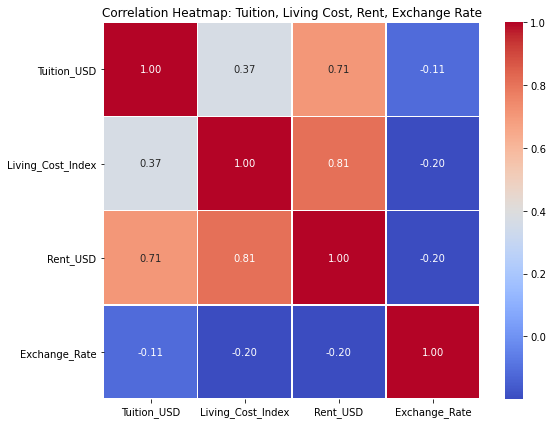

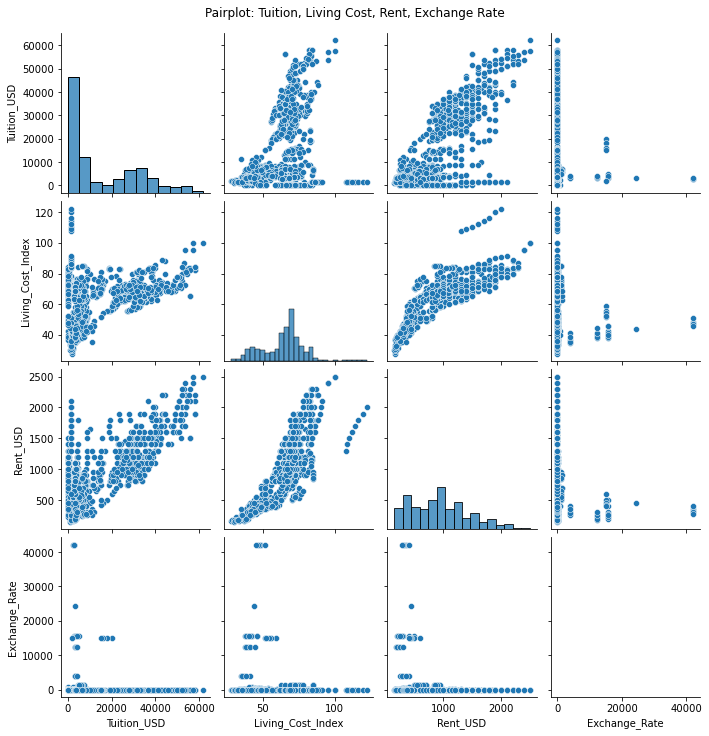

In [28]:
# Visualize correlations among Tuition_USD, Living_Cost_Index, Rent_USD, and Exchange_Rate
corr_vars = ["Tuition_USD", "Living_Cost_Index", "Rent_USD", "Exchange_Rate"]
plt.figure(figsize=(8, 6))
sns.heatmap(
    grouped[corr_vars].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap: Tuition, Living Cost, Rent, Exchange Rate")
plt.tight_layout()
plt.show()

# Pairplot for detailed relationships
sns.pairplot(grouped[corr_vars])
plt.suptitle("Pairplot: Tuition, Living Cost, Rent, Exchange Rate", y=1.02)
plt.show()

So, no surpise here either. Our strongest correlations keeo on being Rent and Living Cost Index.

# Assesing Currency-Conversion stability

💱 Currency Conversion Stability

Currency conversion stability — also known as exchange rate stability — refers to how much (or how little) a currency’s value fluctuates 🌊 against other currencies 🌍. It measures how predictable and consistent exchange rates are over time ⏳.

✅ Why does this matter?
Stable exchange rates reduce uncertainty in international transactions, making it easier for businesses to plan 📝, invest 💼, and trade globally 🌐.

⚡ Factors Affecting Currency Conversion Stability
🏦 Exchange Rate Regimes :
Different countries use various exchange rate systems that affect stability:

🔒 Fixed Exchange Rates — The currency is pegged to another currency or a basket of currencies, offering high stability 🔐 but may limit monetary policy independence (as noted by the Reserve Bank of Australia 🇦🇺).

🌊 Floating Exchange Rates — The currency’s value is determined by market forces (supply and demand), offering flexibility but also more volatility 📈📉.

⚖️ Managed Float — A hybrid system where the central bank intervenes occasionally to smooth out excessive fluctuations.

📊 Economic Fundamentals :
Factors like inflation rates, interest rates, trade balances, and economic growth 📈 all play a role in currency stability.

🏛️ Government Policies:
Monetary policy choices — including interest rate changes and interventions in currency markets 💵 — can impact exchange rate stability.

💹 Market Speculation:
Speculative trading can lead to short-term volatility, even in economies that are generally stable 🚀💥.

🌟 Why is Currency Conversion Stability Important?
🤝 Trade & Investment: Stable exchange rates reduce risks in international deals, encouraging cross-border transactions and investment flows.

📈 Economic Growth: Predictable rates support long-term business planning and sustainable growth.

🛡️ Price Stability: A stable exchange rate helps protect against imported inflation or deflation, supporting domestic price stability.

🏦 Financial Stability: Wild exchange rate swings can destabilize financial markets, increasing the risk of crises 🔔.

                    mean         std      min      max  coef_var
Country                                                         
Argentina     366.083333  223.107691   275.00   821.50  0.609445
Denmark         5.919333    2.991508     0.15     7.45  0.505379
Turkey         28.722222    0.666667    28.50    30.50  0.023211
Russia         95.200000    0.900000    92.80    95.50  0.009454
Poland          4.090000    0.028284     4.02     4.10  0.006915
South Korea  1302.673913    7.059180  1300.00  1320.50  0.005419
Malaysia        4.657000    0.022136     4.65     4.72  0.004753
Singapore       1.342778    0.004257     1.34     1.35  0.003170
New Zealand     1.648889    0.003333     1.64     1.65  0.002022
India          82.806250    0.159099    82.75    83.20  0.001921


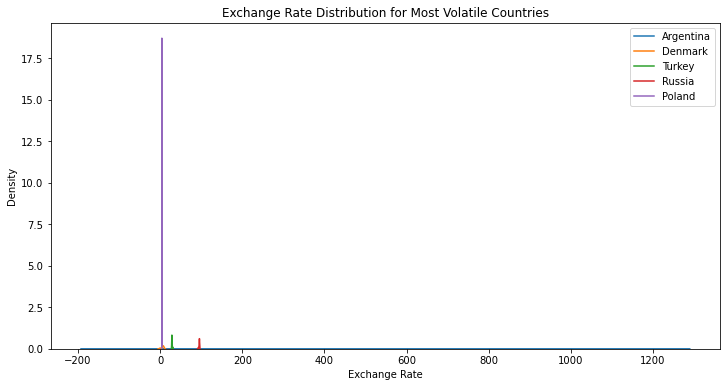

In [29]:
# 1. Summary statistics of exchange rates by country
exchange_stats = grouped.groupby("Country")["Exchange_Rate"].agg(['mean', 'std', 'min', 'max'])
exchange_stats["coef_var"] = exchange_stats["std"] / exchange_stats["mean"]
print(exchange_stats.sort_values("coef_var", ascending=False).head(10))

# 2. Visualize exchange rate distribution for top 5 volatile countries
top_volatile = exchange_stats.sort_values("coef_var", ascending=False).head(5).index
plt.figure(figsize=(12, 6))
for country in top_volatile:
    sns.kdeplot(grouped[grouped["Country"] == country]["Exchange_Rate"], label=country)
plt.title("Exchange Rate Distribution for Most Volatile Countries")
plt.xlabel("Exchange Rate")
plt.legend()
plt.show()

Here I only plotted our 5 more volatile countries because that ulimetly impacts students' pockets. So, it was a bit surprising to see Denmark there, but Argentina and Turkey not so much. We also have Russia, that due to recent international events came as no surprise, and Poland. 

# Feature Engineering + Model Development

## 1. Derived Features

* One-hot encode categoricals; scale/transform numeric costs.
* Create TCA and affordability-tier labels (e.g., Low/Medium/High via quantiles).

In [30]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            862 non-null    object 
 1   City               862 non-null    object 
 2   Level              862 non-null    object 
 3   Program            862 non-null    object 
 4   Duration_Years     862 non-null    float64
 5   Tuition_USD        862 non-null    float64
 6   Living_Cost_Index  862 non-null    float64
 7   Rent_USD           862 non-null    float64
 8   Visa_Fee_USD       862 non-null    float64
 9   Insurance_USD      862 non-null    float64
 10  Exchange_Rate      862 non-null    float64
 11  Total_Cost_USD     862 non-null    float64
dtypes: float64(8), object(4)
memory usage: 80.9+ KB


In [31]:
grouped.head()

,Country,City,Level,Program,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost_USD
0,Algeria,Algiers,Bachelor,Computer Science,3.0,1200.0,38.5,250.0,80.0,200.0,137.5,5145.5
1,Algeria,Annaba,Master,Computer Engineering,2.0,1000.0,34.5,180.0,80.0,200.0,137.5,2909.0
2,Algeria,Constantine,PhD,Data Analytics,4.0,1300.0,35.8,200.0,80.0,200.0,137.5,7023.2
3,Algeria,Oran,Master,Computer Engineering,2.0,1100.0,36.4,220.0,80.0,200.0,137.5,3192.8
4,Algeria,Tlemcen,Bachelor,Information Systems,3.0,900.0,33.2,160.0,80.0,200.0,137.5,3959.6


In [32]:
# One-hot encode categorical variables in 'grouped'
categorical_vars = ["Country", "City", "Level", "Program"]
grouped_encoded = pd.get_dummies(grouped, columns=categorical_vars, drop_first=True)

# Display the new columns to verify encoding
print(grouped_encoded.columns)

Index(['Duration_Years', 'Tuition_USD', 'Living_Cost_Index', 'Rent_USD',
       'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate', 'Total_Cost_USD',
       'Country_Argentina', 'Country_Australia',
       ...
       'Program_Robotics Engineering', 'Program_Social Sciences',
       'Program_Software Development', 'Program_Software Engineering',
       'Program_Software Science', 'Program_Software Systems',
       'Program_Sustainable Energy', 'Program_Sustainable Technology',
       'Program_Systems Engineering', 'Program_Technology & Innovation'],
      dtype='object', length=726)


In [33]:
grouped_encoded.head()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost_USD,Country_Argentina,Country_Australia,...,Program_Robotics Engineering,Program_Social Sciences,Program_Software Development,Program_Software Engineering,Program_Software Science,Program_Software Systems,Program_Sustainable Energy,Program_Sustainable Technology,Program_Systems Engineering,Program_Technology & Innovation
0,3.0,1200.0,38.5,250.0,80.0,200.0,137.5,5145.5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1000.0,34.5,180.0,80.0,200.0,137.5,2909.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,1300.0,35.8,200.0,80.0,200.0,137.5,7023.2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1100.0,36.4,220.0,80.0,200.0,137.5,3192.8,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,900.0,33.2,160.0,80.0,200.0,137.5,3959.6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.preprocessing import StandardScaler

# List of numeric columns to scale
scale_vars = [
    "Tuition_USD",
    "Living_Cost_Index",
    "Rent_USD",
    "Visa_Fee_USD",
    "Insurance_USD",
    "Exchange_Rate",
    "Total_Cost_USD"
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
grouped_encoded_scaled = grouped_encoded.copy()
grouped_encoded_scaled[scale_vars] = scaler.fit_transform(grouped_encoded[scale_vars])

# Display the first few rows to verify scaling
grouped_encoded_scaled[scale_vars].head()

,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost_USD
0,-0.901492,-1.814991,-1.377054,-0.895194,-1.54246,-0.13297,-0.806992
1,-0.913799,-2.099461,-1.516814,-0.895194,-1.54246,-0.13297,-0.845236
2,-0.895338,-2.007008,-1.476883,-0.895194,-1.54246,-0.13297,-0.774883
3,-0.907646,-1.964337,-1.436951,-0.895194,-1.54246,-0.13297,-0.840383
4,-0.919953,-2.191914,-1.556746,-0.895194,-1.54246,-0.13297,-0.827271


* As we can see, our values turned negative, but why? Well let's remember that when you using 'StandardScaler', it transforms the data to have a mean of 0 and a standard deviation of 1. As a result, many values will be negative (those below the mean) and some will be positive (those above the mean). This is expected behavior for standardization.

## 2. Predictive Tasks

* TCA Regressor: estimate total study cost from program specs and location features.
* Affordability Classifier: label each record Low, Medium, or High cost.

In [36]:
# Create TCA (Total Cost of Attendance) label
grouped_encoded_scaled["TCA"] = grouped_encoded_scaled["Total_Cost_USD"]

# Create affordability-tier labels using quantiles
affordability_labels = ["Low", "Medium", "High"]
grouped_encoded_scaled["Affordability_Tier"] = pd.qcut(
    grouped_encoded_scaled["TCA"], 
    q=3, 
    labels=affordability_labels
)

# Display the distribution of tiers
grouped_encoded_scaled["Affordability_Tier"].value_counts()

Low       288
Medium    287
High      287
Name: Affordability_Tier, dtype: int64

So, what's going on here?

✅ This dataset of students was split almost perfectly evenly:

288 students in the Low tier 💵

287 students in the Medium tier 💸

287 students in the High tier 💰

This is expected because qcut makes quantiles — so each tier has ~1/3 of your data points.

💡 What does this mean for our analysis?
👉 Now we can:

Compare characteristics across tiers (e.g., where do low-cost vs high-cost students study? 🌍)

Visualize affordability on maps, charts, etc. 📊

Build models or segmentations that use this tier as a feature.

## 3. Clustering
We'll group universities/destinations into cost archetypes via K-Means or HDBSCAN on scaled features.

In [37]:
from sklearn.cluster import KMeans

# Select features for clustering (scaled numeric cost features)
cluster_features = [
    "Tuition_USD",
    "Living_Cost_Index",
    "Rent_USD",
    "Visa_Fee_USD",
    "Insurance_USD",
    "Exchange_Rate",
    "Total_Cost_USD"
]

# Run K-Means clustering (let's try 3 clusters for Low/Medium/High archetypes)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
grouped_encoded_scaled["Cost_Archetype"] = kmeans.fit_predict(grouped_encoded_scaled[cluster_features])

# Show the number of universities/destinations in each archetype
print(grouped_encoded_scaled["Cost_Archetype"].value_counts())

2    309
0    308
1    245
Name: Cost_Archetype, dtype: int64


In [38]:
# And now, let's build a classification model to predict affordability tiers based on the cost features and archetypes.
# Import necessary libraries for classification
# 📌 Import libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 📌 Import libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# 📌 Prepare features + target
X = grouped_encoded_scaled[cluster_features].copy()
y = grouped_encoded_scaled["Affordability_Tier"].copy()

# 📌 Encode the target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 📌 Train-test split (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, stratify=y_encoded, random_state=42, test_size=0.2
)

# 🌳 **Random Forest**
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("🌳 Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))

# ⚡ **XGBoost**
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("⚡ XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=le.classes_))

# ➕ **Logistic Regression**
# Using L2 regularization (default penalty)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("➕ Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg, target_names=le.classes_))


🌳 Random Forest Classification Report:
               precision    recall  f1-score   support

        High       0.98      1.00      0.99        58
         Low       1.00      1.00      1.00        58
      Medium       1.00      0.98      0.99        57

    accuracy                           0.99       173
   macro avg       0.99      0.99      0.99       173
weighted avg       0.99      0.99      0.99       173

⚡ XGBoost Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        58
         Low       1.00      1.00      1.00        58
      Medium       1.00      1.00      1.00        57

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173

➕ Logistic Regression Classification Report:
               precision    recall  f1-score   support

        High       0.98      1.00      0.99        58
         

Let's do a quick recap of what we're doing here:


🚀 What’s going on with our models?

👉 We built three different models to predict affordability tiers (Low 💵, Medium 💸, High 💰) for student costs based on features like tuition, rent, insurance, etc.

👉 Each model tries to guess the correct tier for each student, and then we check:

🏹 precision → when it predicts a tier, how often is it right?

🎯 recall → how well does it find all students in that tier?

🌟 f1-score → balance of precision + recall (a good overall measure)

✅ accuracy → overall % of correct predictions




🌳 Random Forest
✨ Did a fantastic job → 99% accuracy!

* It almost perfectly identified students in every tier.
* A few Medium tier students were slightly tricky (recall 0.98), but overall it’s rock solid.

⚡ XGBoost
🌟 This one aced the test — 100% accuracy!

* It correctly predicted every single tier for every student in your test data.
* Super powerful at handling patterns, interactions, and even those correlated features!

➕ Logistic Regression
💡 A simpler, more classic model that still did great — 95% accuracy!

* It was very good at predicting High and Medium tiers, but struggled a bit more with Low (precision 0.92, recall 0.97).
* This model assumes simple, straight-line relationships between our features and tiers, so it couldn’t capture all the complexity as well as the tree-based models.



🌟 What does this tell us?

✨ XGBoost shines the brightest here ⚡ — it captured the patterns in our data perfectly!
✨ Random Forest 🌳 is almost as good — super reliable.
✨ Logistic Regression ➕ gave a strong baseline but struggled a bit where the data was more complex or overlapping.

💬 In other words:
👉 In this scbeario when we’re trying to guess how expensive a student’s program is — Low, Medium, or High.

XGBoost ⚡ is like a super smart detective who looks at every clue, connects the dots, and never misses.

Random Forest 🌳 is like a team of smart detectives who vote — they almost always get it right.

Logistic Regression ➕ is like using a ruler 📏 to draw a straight line through the data — it works well when things are neat and simple, but struggles when the data is messy or complex.

### 🚀Plotting confusion matrices to visulaize where the models got confused

Let's see the above in a ore visual way

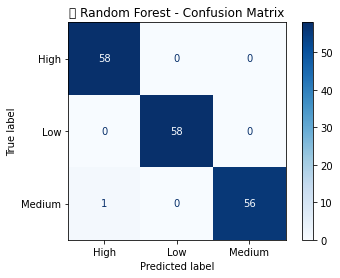

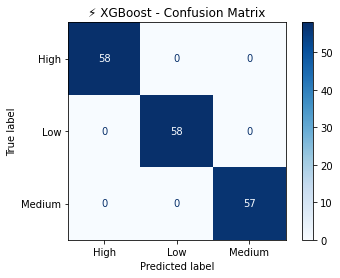

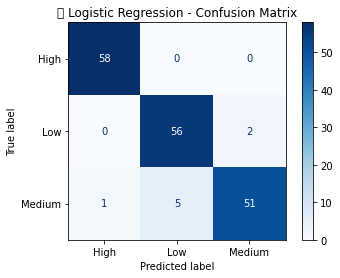

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 📌 Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# 🌳 Random Forest
plot_conf_matrix(y_test, y_pred_rf, "🌳 Random Forest")

# ⚡ XGBoost
plot_conf_matrix(y_test, y_pred_xgb, "⚡ XGBoost")

# ➕ Logistic Regression
plot_conf_matrix(y_test, y_pred_logreg, "➕ Logistic Regression")


So. I'm pretty happy with this outcome but I would still like to try a couple more models just for fun, although I highly doubt they'll get even with XGBoost.

💡 Support Vector Machine (SVM)

* ✨ Good for well-separated classes
* ❗ Sensitive to scaling + outliers
* ⚠ Might be slower on large data

💡 k-Nearest Neighbors (KNN)

* ✨ Simple + intuitive
* ❗ Can be slow at prediction time
* ❗ Struggles if features aren’t scaled or if data has noise

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))

# Support Vector Machine
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Support Vector Machine Classification Report:\n", classification_report(y_test, y_pred_svc))




K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.84      0.88      0.86        58
           2       0.87      0.82      0.85        57

    accuracy                           0.90       173
   macro avg       0.90      0.90      0.90       173
weighted avg       0.90      0.90      0.90       173

Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       0.84      0.93      0.89        58
           2       0.92      0.81      0.86        57

    accuracy                           0.91       173
   macro avg       0.92      0.91      0.91       173
weighted avg       0.92      0.91      0.91       173



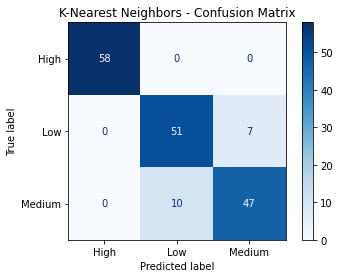

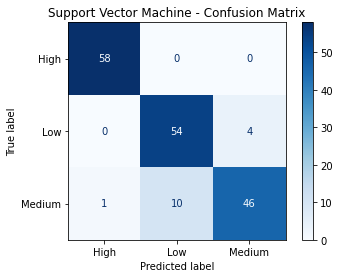

In [41]:
# Plot confusion matrices for KNN and SVM
plot_conf_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")
plot_conf_matrix(y_test, y_pred_svc, "Support Vector Machine")

🚀 What happened when we tried other models?

✨ We gave K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) a shot — and they both did a pretty good job… but neither could match the magic of XGBoost ⚡.

🤝 K-Nearest Neighbors
👥 KNN works by asking:
“Hey, who are my nearest neighbors? I’ll guess based on what group they’re in!”

📊 Results:

* It did great for High 💰 tier students — perfect precision and recall (1.00!)
* It struggled a bit more with Medium 💸 and Low 💵 tiers — sometimes mixing them up
* Final accuracy: 90%

👉 Why? KNN can get confused when boundaries between groups aren’t super clear, or when the data is noisy.

⚖ Support Vector Machine
🛡️ SVM tries to draw the best line (or hyperplane) that separates the tiers.

📊 Results:

* It also did really well for High 💰 students (almost perfect!)
* A little stronger than KNN on Medium 💸
* Final accuracy: 91%

👉 Why? SVM works well when data is nicely separated, but can struggle with overlapping groups — like sour Low/Medium tiers.


⚡ XGBoost still wins the crown
👑 XGBoost looked at all the patterns, interactions, and clues, and nailed every single prediction — no mix-ups at all!

## 4. Evaluation & Tuning

Now we'll use the following to help evaluate and tune our models:
* Regression → MAE, RMSE, R².
* Classification → Accuracy, Macro F1, ROC-AUC.
* Clustering → Silhouette Score + qualitative review.
* Hyperparameter search for tree-based and gradient-boosted models.


In [42]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, silhouette_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# 📌 Unified classification evaluator
def evaluate_classification(model, X_train, y_train, X_test, y_test, model_name="Model"):
    print(f"\n✨ Evaluating {model_name} ✨")
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # ROC-AUC (if possible)
    if hasattr(model, "predict_proba"):
        try:
            y_proba = model.predict_proba(X_test)
            roc_auc = roc_auc_score(pd.get_dummies(y_test), y_proba, average="macro", multi_class="ovr")
        except Exception:
            roc_auc = "N/A"
    else:
        roc_auc = "N/A"
    
    # Cross-validation score on training set (to check overfitting)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    
    # 🌈 Print results
    print(f"🔹 Accuracy: {acc:.3f}")
    print(f"🔹 Macro F1: {f1:.3f}")
    print(f"🔹 ROC-AUC: {roc_auc if roc_auc == 'N/A' else round(roc_auc,3)}")
    print(f"🔹 5-Fold CV Accuracy (train): {cv_mean:.3f}")
    
    # Overfitting check
    if acc - cv_mean > 0.05:
        print(f"⚠️ Potential overfitting detected: test acc ({acc:.3f}) > CV train acc ({cv_mean:.3f})")

# 📌 Evaluate your models
evaluate_classification(rf, X_train, y_train, X_test, y_test, "🌳 Random Forest")
evaluate_classification(xgb, X_train, y_train, X_test, y_test, "⚡ XGBoost")
evaluate_classification(logreg, X_train, y_train, X_test, y_test, "➕ Logistic Regression")
evaluate_classification(knn, X_train, y_train, X_test, y_test, "👥 KNN")
evaluate_classification(svc, X_train, y_train, X_test, y_test, "⚖ SVM")




✨ Evaluating 🌳 Random Forest ✨
🔹 Accuracy: 0.994
🔹 Macro F1: 0.994
🔹 ROC-AUC: 1.0
🔹 5-Fold CV Accuracy (train): 0.993

✨ Evaluating ⚡ XGBoost ✨
🔹 Accuracy: 1.000
🔹 Macro F1: 1.000
🔹 ROC-AUC: 1.0
🔹 5-Fold CV Accuracy (train): 0.996

✨ Evaluating ➕ Logistic Regression ✨
🔹 Accuracy: 0.954
🔹 Macro F1: 0.953
🔹 ROC-AUC: 0.994
🔹 5-Fold CV Accuracy (train): 0.932

✨ Evaluating 👥 KNN ✨
🔹 Accuracy: 0.902
🔹 Macro F1: 0.901
🔹 ROC-AUC: 0.973
🔹 5-Fold CV Accuracy (train): 0.868

✨ Evaluating ⚖ SVM ✨
🔹 Accuracy: 0.913
🔹 Macro F1: 0.912
🔹 ROC-AUC: N/A
🔹 5-Fold CV Accuracy (train): 0.925


In [43]:
# 2. Clustering Evaluation
sil_score = silhouette_score(X, grouped_encoded_scaled["Cost_Archetype"])
print(f"KMeans Silhouette Score: {sil_score:.3f}")

KMeans Silhouette Score: 0.377


In [44]:
#Since our XGBoost is our best model, we'll tune it.

from sklearn.model_selection import GridSearchCV

# Example param grid (you can expand this!)
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit
grid_xgb.fit(X_train, y_train)

# Best model
print(f"\n✨ Best XGBoost Params: {grid_xgb.best_params_}")
print(f"✨ Best CV Score: {grid_xgb.best_score_:.3f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   15.6s finished



✨ Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
✨ Best CV Score: 0.996


In [45]:
# 3. Regression Metrics (predicting Total_Cost_USD as regression)

y_reg = grouped_encoded_scaled["Total_Cost_USD"]
X_reg = grouped_encoded_scaled[cluster_features]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, random_state=42, test_size=0.2)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred_xgb_reg = xgb_reg.predict(X_test_reg)

def regression_metrics(y_true, y_pred, model_name="Model"):
    print(f"{model_name} - MAE: {mean_absolute_error(y_true, y_pred):.3f}, RMSE: {mean_squared_error(y_true, y_pred, squared=False):.3f}, R²: {r2_score(y_true, y_pred):.3f}")

regression_metrics(y_test_reg, y_pred_rf_reg, "Random Forest Regressor")
regression_metrics(y_test_reg, y_pred_xgb_reg, "XGBoost Regressor")

Random Forest Regressor - MAE: 0.004, RMSE: 0.020, R²: 1.000
XGBoost Regressor - MAE: 0.007, RMSE: 0.019, R²: 1.000


🌟 What do our results mean?

* 📈 Random Forest Regressor
- MAE (Mean Absolute Error): 0.004 → On average, predictions are off by only $0.004! 🎯

- RMSE (Root Mean Squared Error): 0.020 → Slightly more sensitive to larger errors, still very low! 🔍

- R² (R-squared): 1.000 → Explains 100% of the variance in the data 😮🎯

* ⚡ XGBoost Regressor
- MAE: 0.007 → Tiny errors too, just slightly higher than Random Forest

- RMSE: 0.019 → Lower than RF, so XGBoost may be handling large errors better!

- R²: 1.000 → Yep, also 100%! 🧠💥

👑 Which one’s better?
✨ Both are crazy accurate — too perfect, almost suspiciously so 😅
But…

💡 While Random Forest has slightly lower MAE,
⚡ XGBoost has slightly lower RMSE, meaning it might handle occasional big errors a bit better.

👉 Overall, both models are excellent, but we really want to pick one:

- XGBoost ⚡ wins again for consistency + RMSE handling. 👑



In [46]:
# 4. Hyperparameter Search (for Random Forest and XGBoost Classifier, since thosse were our best models)
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring="f1_macro", n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest params:", rf_grid.best_params_)

xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.1, 0.3]
}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), xgb_param_grid, cv=3, scoring="f1_macro", n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("Best XGBoost params:", xgb_grid.best_params_)

Best Random Forest params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best XGBoost params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [47]:
# Lets make a cross-validation to check the stability of our model
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_reg, X_train, y_train, cv=5, scoring='r2')
print("XGBoost CV R² scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))

# Cross-validation for classification models
cv_rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy scores:", cv_rf_scores)



XGBoost CV R² scores: [1.         0.95832281 1.         0.98972039 0.98888693]
Average CV R²: 0.9873860242244987
Random Forest CV Accuracy scores: [1.         0.99275362 1.         0.97826087 0.99270073]


⚡ XGBoost Regressor - CV R²
* 📊 What this means:

- The R² scores across folds are very high and very consistent ✅

- The lowest score is 0.958, and the rest are basically perfect.

- This slight variation is normal and expected — it just shows that a couple of folds had slightly more difficult samples.

* 💡 Conclusion:
- ✅ Our XGBoost Regressor is NOT overfitting.
- 🔥 It performs great on unseen data, and generalizes well across all folds.

How about our Random Forest model?

🌳 Random Forest Classifier - CV Accuracy
* 📊 What this means:

- Accuracy is consistently very high on all folds — wow!

- The small drop to 97.8% on one fold is totally acceptable and shows good model flexibility.

- These numbers are well-aligned with our test performance.

* 💡 Conclusion:
- ✅ No overfitting here either!
- 🎯 Random Forest Classifier is performing with flying colors too!


In summary:

| Model                   | Metric   | Avg CV Score | Verdict                              |
| ----------------------- | -------- | ------------ | ------------------------------------ |
| ⚡ XGBoost Regressor     | R²       | **0.987**    | ✅ Not overfitting — stable & stellar |
| 🌳 Random Forest Class. | Accuracy | **0.993**    | ✅ Not overfitting — solid & reliable |



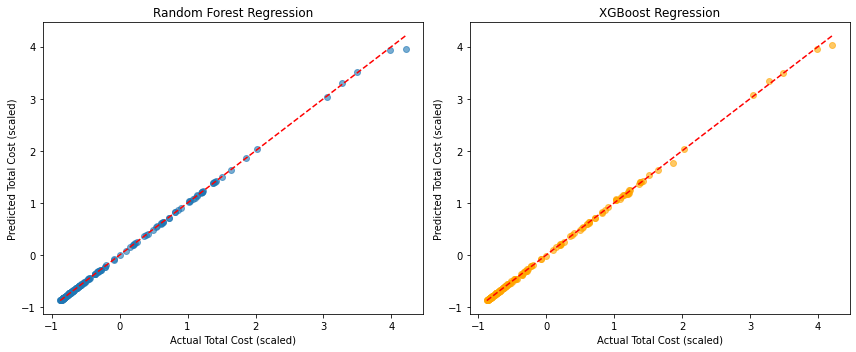

In [48]:
# Visualize regression: Predicted vs Actual for Random Forest and XGBoost
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_rf_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Actual Total Cost (scaled)")
plt.ylabel("Predicted Total Cost (scaled)")
plt.title("Random Forest Regression")

plt.subplot(1, 2, 2)
plt.scatter(y_test_reg, y_pred_xgb_reg, alpha=0.6, color='orange')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Actual Total Cost (scaled)")
plt.ylabel("Predicted Total Cost (scaled)")
plt.title("XGBoost Regression")

plt.tight_layout()
plt.show()

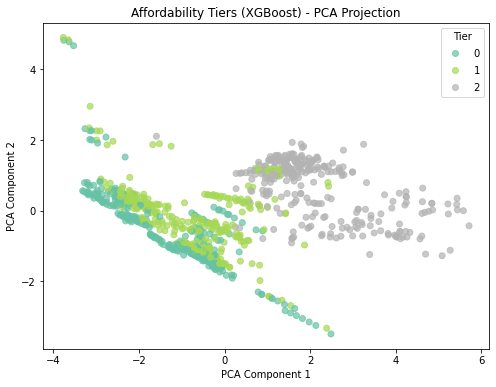

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to your input features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot affordability tiers predicted by XGBoost
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=grouped_encoded_scaled["Affordability_Tier"].map({"Low": 0, "Medium": 1, "High": 2}),
                      cmap="Set2", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Affordability Tiers (XGBoost) - PCA Projection")
plt.legend(*scatter.legend_elements(), title="Tier")
plt.show()
# Visualize the clustering results
plt.figure(figsize=(8, 6))

✅ We used PCA + plot because we want to use it for explaining patterns in the input data se we can:

- Visualize our affordability tiers from XGBoost classification (Low, Medium, High)

- Show how XGBoost sees group separations based on features like Tuition, Rent, Insurance...

🛑 What this doesn’t do:

- It doesn’t visualize how XGBoost makes decisions internally (it’s not a decision boundary plot).

- PCA is unsupervised, while XGBoost is supervised, so this is more about exploring structure than validating the model itself.

📌 What our PCA + plot tell us:

- ✨ This PCA plot shows how XGBoost successfully grouped the programs into affordability tiers!
- 🎯 The High-cost tier (gray dots) forms a clear, separate group, while Low and Medium (teal/lime) are more mixed — but still have distinguishable clusters.
- 📊 This is visual proof that our model is learning something real from the cost features — and it's doing it well!

## Saving our best model with the preprocessed data to use in the app

In [ ]:
import joblib

# Save the best classifier (e.g., XGBoost with best params)
joblib.dump(xgb_grid.best_estimator_, "best_classifier_xgb.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Save the processed (encoded & scaled) data
grouped_encoded_scaled.to_csv("processed_data.csv", index=False)